# 5.2 Big Data in Genomics - Visualise

This notebooks visualises the results of kMeans clustering of the genomics variants from chromosome 22 of the 1000 Genomes project dataset (phase3).

We have reduced all the variants to 50 cluster centers, so that now each of the ~2500 individuals can be representation by a vector of size 50.

The results are available in: `data/cluster-centers_chr22.csv.gz`.

Now we will compute the average representation for each population averaging the vectors of the inviduals from this population and then use hierarchical clustering to see, which populations are similiar.

In [1]:
# import pandas and set display options
import pandas as pd
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 8)

In [2]:
# read and display the representations

representationPD = pd.read_csv('data/cluster-centers_chr22.csv.gz', index_col=0)
representationPD

,0,1,2,3,...,46,47,48,49
Sample ID,,,,,,,,,
HG00096,1.763517,0.027793,0.000000,1.129517,...,0.004106,1.012876,0.000000,0.621353
HG00097,1.788846,0.039244,0.000000,0.997455,...,0.000880,0.000000,1.179625,0.557942
...,...,...,...,...,...,...,...,...,...
NA21143,1.754749,0.028460,0.725055,0.796692,...,0.002933,0.000000,0.938338,0.628241
NA21144,1.781052,0.017232,0.000000,0.928753,...,0.010850,0.000000,0.919571,0.559157


In [3]:
# read the pedigree file that associates individuals with their populations

pedPD = pd.read_csv('data/integrated_call_samples_v2.20130502.ALL.ped.bz2', sep='\t', index_col=1)
pedPD

,Family ID,Paternal ID,Maternal ID,Gender,...,phase 3 genotypes,related genotypes,omni genotypes,affy_genotypes
Individual ID,,,,,,,,,
HG00096,HG00096,0,0,1,...,1,0,1,1
HG00097,HG00097,0,0,2,...,1,0,1,1
...,...,...,...,...,...,...,...,...,...
NA21143,NA21143,0,0,2,...,1,0,1,1
NA21144,NA21144,0,0,2,...,1,0,1,1


In [4]:
# compute the average representation per population

populationRepresentationPD = representationPD.join(pedPD).groupby('Population').mean()[representationPD.columns]
populationRepresentationPD

,0,1,2,3,...,46,47,48,49
Population,,,,,,,,,
ACB,1.805210,0.309657,0.182349,0.826776,...,0.111718,0.264843,0.026167,0.792401
ASW,1.802774,0.265552,0.179231,0.853655,...,0.080712,0.265509,0.042977,0.755019
...,...,...,...,...,...,...,...,...,...
TSI,1.769293,0.030587,0.099593,1.038307,...,0.008914,0.200485,0.052477,0.535489
YRI,1.808162,0.361357,0.270144,0.791332,...,0.107181,0.282396,0.021718,0.836228


In [5]:
# load population descriptions
populationDescPD = pd.read_csv('data/1000_gen_populations.txt', sep='\t', index_col=0)
populationDescPD

,Population Description,Super Population Code,Sequence Data Available,Alignment Data Available,Variant Data Available
Population Code,,,,,
CHB,"Han Chinese in Bejing, China",EAS,1,1,1
JPT,"Japanese in Tokyo, Japan",EAS,1,1,1
...,...,...,...,...,...
STU,Sri Lankan Tamil from the UK,SAS,1,1,1
ITU,Indian Telugu from the UK,SAS,1,1,1


In [6]:
# create labels for the dendrogram `SuperPopulationCode` + `Population Description`

populationLabels = populationDescPD \
    .loc[populationRepresentationPD.index][['Super Population Code', 'Population Description']].apply(" ".join, axis=1)
populationLabels

Population
ACB             AFR African Caribbeans in Barbados
ASW    AFR Americans of African Ancestry in SW USA
                          ...                     
TSI                          EUR Toscani in Italia
YRI                  AFR Yoruba in Ibadan, Nigeria
dtype: object

In [7]:
# compute pair-wise distances between population representations
# and run hierarchical clustering

from scipy.spatial.distance import pdist
import scipy.cluster

pairWisePopulationDistances = pdist(populationRepresentationPD)
populationLinkage = scipy.cluster.hierarchy.linkage(pairWisePopulationDistances, method='complete')

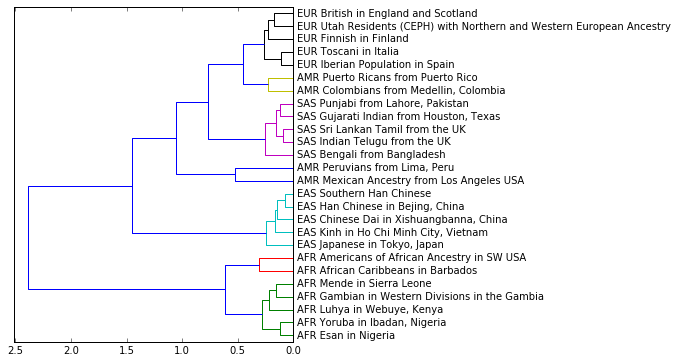

In [8]:
# display the dendrogram

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,6)
plt.close()
scipy.cluster.hierarchy.dendrogram(populationLinkage, orientation = 'left', 
                                   color_threshold = 0.4, labels = populationLabels, 
                                   leaf_font_size = 10)
plt.show()
display()

We can clearly see from the chart above that the 50 cluster centers are indeed a reasonable representation of the entire chromosome.

You can now play around modifying pieces of the code.

When you are done and you are running off the local machine remember to *close the notebook* with `File/Close and Halt`.